Name: Shreyas Dongre   
Roll no: 082          
Stream: CS (AI)      
Division: I                         
Semester: 5th Semester                                           
Batch: I-3            
                                                                       Date: 4/8/2022       
Subject: DL
###Experiment-3

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Iris.csv')
df.drop('Id',axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Performing Onehot Encoding on Target Variable
from sklearn.preprocessing import OneHotEncoder
label = np.array(df.iloc[:,-1])
print(label.shape)
label = label.reshape((-1,1))
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(label)
dataset = pd.DataFrame({'flower1':y_onehot[:,0], 'flower2':y_onehot[:,1], 'flower3':y_onehot[:,2]})
dataset.head()

(150,)


,flower1,flower2,flower3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [4]:
#Dropping Unnecessary Columns 
df.drop('Species', axis=1, inplace=True)

In [5]:
final_df=pd.concat([df,dataset],axis=1)
final_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,flower1,flower2,flower3
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [6]:
#Standardizing the 4 num cols
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
std_scalar = StandardScaler()
#makes data scale free by conv statistical dist of data
#mean is made 0 and var is made 1
#x=(x-mean)/std
final_df.iloc[:,[0,1,2,3]] = std_scalar.fit_transform(final_df.iloc[:,[0,1,2,3]])
final_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,flower1,flower2,flower3
0,-0.900681,1.032057,-1.341272,-1.312977,1.0,0.0,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,1.0,0.0,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,1.0,0.0,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,1.0,0.0,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,1.0,0.0,0.0


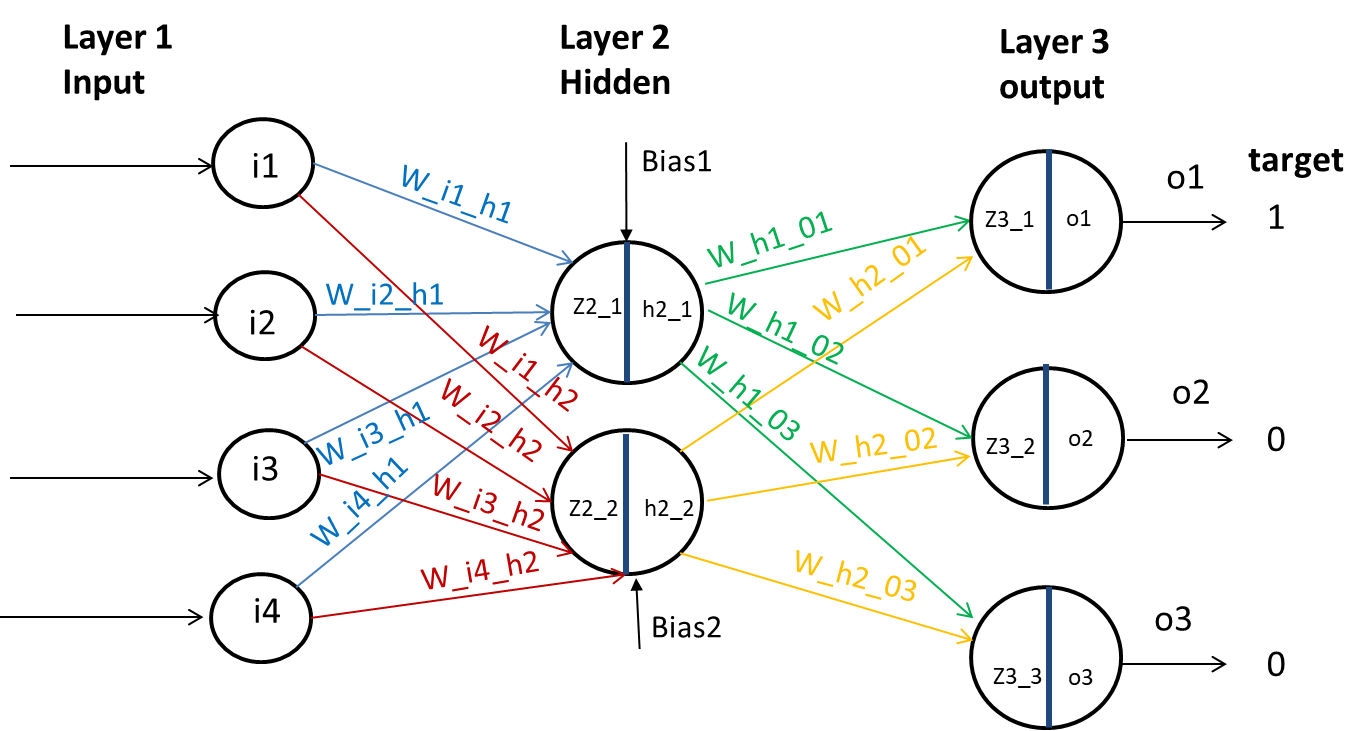

In [8]:
#Function for sigmoid
def sigmoid(x):
  return 1/(1+ np.exp(-x))

def accuracy(y_pred, y_true):
  acc=y_pred.argmax(axis=1)==y_true.argmax(axis=1)
  return acc.mean()

def mean_square_error(y_pred,y_true):
  return ((y_pred-y_true).sum()/(2*y_pred.size)) 

In [9]:
input=final_df.iloc[:,0:4]

In [10]:
#initializing 3 layer feed fwd Neural Network
N=input.size

In [11]:
iter=5000
learning_rate =0.01

In [12]:
input_size =4

In [13]:
hidden_size = 2

In [14]:
output_size=3

In [15]:
res1=pd.DataFrame(columns=["mse","accuracy"])

In [16]:
#initialize the weights for hidden and output layers with rand vals
np.random.seed(10)

In [17]:
# initializing weight for the hidden layer
w1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

In [18]:
# initializing weight for the output layer
w2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

In [19]:
bias=np.random.rand(1)

In [20]:
for i in range(iter):
  #feedforward on hidden layer
  Z1=np.dot(input,w1)+bias
  A1=sigmoid(Z1)
  #feedforward on output layer
  Z2=np.dot(A1,w2)
  A2=sigmoid(Z2)
  #calculating error
  mse=mean_square_error(A2,y_onehot)
  acc=accuracy(A2,y_onehot)
  res1 = res1.append({"mse":mse,"accuracy":acc},ignore_index=True)
  E1 = A2 - y_onehot
  dw1 = E1*A2*(1-A2)
  E2=np.dot(dw1,w2.T)
  dw2=E2*A1*(1-A1)
  w2_update= np.dot(A1.T,dw1)/N
  w1_update=np.dot(input.T,dw2)/N
  w2 = w2- learning_rate*w2_update
  w1 = w1- learning_rate*w1_update

In [21]:
res1.shape

(5000, 2)

In [22]:
# MSE and Accuracy for each iteration
res1

,mse,accuracy
0,0.105259,0.513333
1,0.105245,0.513333
2,0.105231,0.513333
3,0.105217,0.513333
4,0.105203,0.513333
...,...,...
4995,0.052571,0.560000
4996,0.052564,0.560000
4997,0.052557,0.560000
4998,0.052551,0.560000


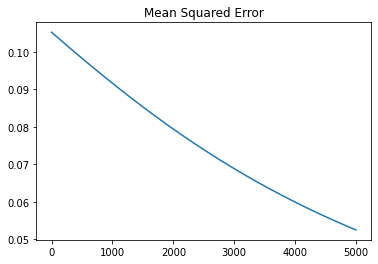

In [23]:
res1.mse.plot(title="Mean Squared Error")

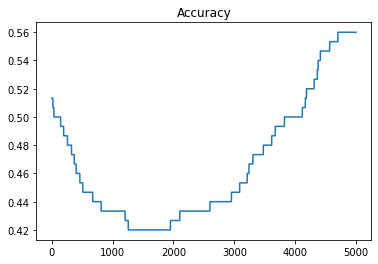

In [24]:
res1.accuracy.plot(title="Accuracy")

In [25]:
#def func for bacc propo. function takes learning rate , Number of iterations and number of samples as input
def back_propogation(learning_rate,iterations,N,W1,W2,bias,input,y_onehot):
  res1 = pd.DataFrame(columns=["mse", "accuracy"])
  for i in range(iter):
    #feedforward on hidden layer
    Z1=np.dot(input,W1)+bias
    A1=sigmoid(Z1)
    #feedforward on output layer
    Z2=np.dot(A1,W2)
    A2=sigmoid(Z2)
    #calculating error
    mse=mean_square_error(A2,y_onehot)
    acc=accuracy(A2,y_onehot)
    res1 = res1.append({"mse":mse,"accuracy":acc},ignore_index=True)
    E1 = A2 - y_onehot
    dw1 = E1*A2*(1-A2)
    E2=np.dot(dw1,W2.T)
    dw2=E2*A1*(1-A1)
    W2_update= np.dot(A1.T,dw1)/N
    W1_update=np.dot(input.T,dw2)/N
    W2 = W2- learning_rate*W2_update
    W1 = W1- learning_rate*W1_update
  last = res1.iloc[-1].tolist()
  return last[0],last[1]

In [26]:
#Extra assign 
#Varying Learning rate and Number of iterations to analyze performance of network
#Vary the leaqrning rate as 0.01, 0.1,0.2,0.3,0.4,0.5
#Vary the nmber of iterations as 500 and 5000 for each learning rate


#N is the number of samples per iteration
N=input.size

mse_1,acc_1=back_propogation(0.01,500,N,w1,w2,bias,input,y_onehot)
mse_2,acc_2=back_propogation(0.01,5000,N,w1,w2,bias,input,y_onehot)
mse_3,acc_3=back_propogation(0.1,500,N,w1,w2,bias,input,y_onehot)
mse_4,acc_4=back_propogation(0.1,5000,N,w1,w2,bias,input,y_onehot)
mse_5,acc_5=back_propogation(0.2,500,N,w1,w2,bias,input,y_onehot)
mse_6,acc_6=back_propogation(0.2,5000,N,w1,w2,bias,input,y_onehot)
mse_7,acc_7=back_propogation(0.3,500,N,w1,w2,bias,input,y_onehot)
mse_8,acc_8=back_propogation(0.3,5000,N,w1,w2,bias,input,y_onehot)
mse_9,acc_9=back_propogation(0.4,500,N,w1,w2,bias,input,y_onehot)
mse_10,acc_10=back_propogation(0.4,5000,N,w1,w2,bias,input,y_onehot)
mse_11,acc_11=back_propogation(0.5,500,N,w1,w2,bias,input,y_onehot)
mse_12,acc_12=back_propogation(0.5,5000,N,w1,w2,bias,input,y_onehot)




In [27]:
data1 = [['1','0.01','500',mse_1,acc_1],['2','0.01','5000',mse_2,acc_2],['3','0.1','500',mse_3,acc_3],
         ['4','0.1','5000',mse_4,acc_4],['5','0.2','500',mse_5,acc_5],['6','0.2','5000',mse_6,acc_6],
         ['7','0.3','500',mse_7,acc_7],['8','0.3','5000',mse_8,acc_8], ['9','0.4','500',mse_9,acc_9], 
         ['10','0.4','5000',mse_10,acc_10], ['11','0.5','500',mse_11,acc_11], ['12','0.5','5000',mse_12,acc_12]]
df3 = pd.DataFrame(data1, columns = ['SNo','Learning Rate','Iterations','MSE','Accuracy'])
df3

,SNo,Learning Rate,Iterations,MSE,Accuracy
0,1,0.01,500,0.030840,0.660000
1,2,0.01,5000,0.030840,0.660000
2,3,0.1,500,0.017473,0.906667
3,4,0.1,5000,0.017473,0.906667
4,5,0.2,500,0.013771,0.940000
5,6,0.2,5000,0.013771,0.940000
6,7,0.3,500,0.012687,0.966667
7,8,0.3,5000,0.012687,0.966667
8,9,0.4,500,0.012492,0.966667
9,10,0.4,5000,0.012492,0.966667


In [28]:
#Finding minimum error
df3.MSE.min()

0.012443760623598404

In [29]:
#Finding maximum accuracy
df3.Accuracy.max()

0.9666666666666667

In [30]:
#! jupyter nbconvert --to html I082_Shreyas_Dongre_DL_Exp3.ipynb

#Conclusion:
1) We implemented back propogation on iris dataset and managed to fine tune of the ANN and get more accuracy than we did in previous experiment.    
2) Back-propogation is the practice of fine-tuning the weights of a neural net based on the error rate (i.e. loss) obtained in the previous epoch (i.e. iteration). Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization.  
3) We attained optimum performance at 0.5 Learning rate and 500 iterations. 